<a href="https://colab.research.google.com/github/S3688570/Cars_Deep_Learning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [59]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'Getting started.pdf'


In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from PIL import Image
import numpy as np
import os

In [0]:
epochs = 25 #@param {type:"number"}
validation_steps = 32 #@param {type:"number"}
img_height = 128 #@param {type:"integer"}
img_width = 128 #@param {type:"integer"}


In [62]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
              input_shape = (img_width, img_height, 3), 
              activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Add dropout to avoid overfitting
classifier.add(Dropout(0.25))

#Add another convolutional layer
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#Add another convolutional layer
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

#Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, 
              activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, 
                     activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(output_dim = 1, 
                     activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid",

In [63]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set',
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set',
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2890 images belonging to 2 classes.
Found 747 images belonging to 2 classes.


In [0]:
def my_gen(gen):
    while True:
        try:
            imgs, labels = next(gen)
            yield imgs, labels
        except:
            pass

In [65]:
history = classifier.fit_generator(my_gen(training_set),
                         steps_per_epoch = 78,
                         epochs = epochs,
                         validation_data = test_set,
                         validation_steps = validation_steps)

Epoch 1/25
 1/78 [..............................] - ETA: 3:13 - loss: 0.7198 - acc: 0.4688

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


78/78 [==============================] - 46s 593ms/step - loss: 0.6900 - acc: 0.5312 - val_loss: 0.6099 - val_acc: 0.6810
Epoch 2/25
78/78 [==============================] - 42s 533ms/step - loss: 0.6217 - acc: 0.6823 - val_loss: 0.5206 - val_acc: 0.7338
Epoch 3/25
78/78 [==============================] - 42s 534ms/step - loss: 0.5704 - acc: 0.7204 - val_loss: 0.5261 - val_acc: 0.7230
Epoch 4/25
78/78 [==============================] - 42s 543ms/step - loss: 0.5379 - acc: 0.7503 - val_loss: 0.5170 - val_acc: 0.7727
Epoch 5/25
78/78 [==============================] - 41s 531ms/step - loss: 0.5240 - acc: 0.7595 - val_loss: 0.4553 - val_acc: 0.7946
Epoch 6/25
78/78 [==============================] - 40s 511ms/step - loss: 0.5281 - acc: 0.7479 - val_loss: 0.5327 - val_acc: 0.7169
Epoch 7/25
78/78 [==============================] - 40s 514ms/step - loss: 0.5030 - acc: 0.7714 - val_loss: 0.4712 - val_acc: 0.7916
Epoch 8/25
78/78 [==============================] - 42s 540ms/step - loss: 0.500

In [66]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


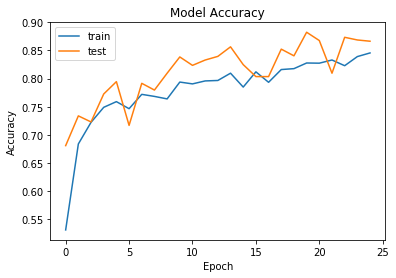

In [67]:
import matplotlib.pyplot as plt
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

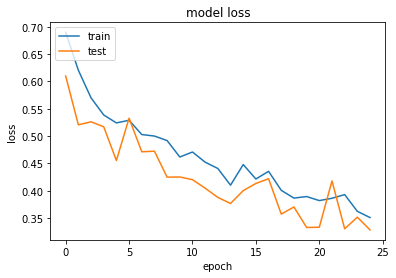

In [68]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
training_set.class_indices

{'car': 0, 'crash': 1}

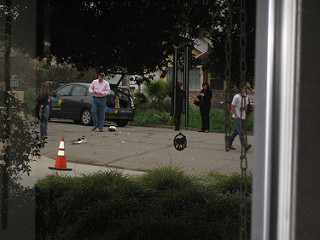

In [70]:

testCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/')
testFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/' + testCarImages[220]

test_image = image.load_img(testFilename, target_size = (img_width, img_height))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
test_set.class_indices
if result[0][0] >= 0.5:
  prediction = 'crash'
else: 
  prediction = 'car'


dimage = Image.open(testFilename)
dimage


In [71]:
print(prediction)

crash
